<a href="https://colab.research.google.com/github/mburu-mwangi/carrefour-assessment/blob/main/Carrefour_R_analysis_rmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights

### a) Specifying the Data Analytic Question



### b) Defining the Metric for Success

### c) Understanding the context 

## 2. Reading the Data

### Importing the various libraries

In [57]:
# install.packages(tidyverse)
library(tidyverse)
# install.packages(lubridate)
library(lubridate)
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)
install.packages("arules")
library(arules)

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Importing the various datasets

 This project is divided into 4 parts thus having 3 datasets(df1,df2,df3)

In [58]:
# Reading the first dataset
#

df1 <- read.csv("http://bit.ly/CarreFourDataset")
head(df1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [59]:
# Reading the second dataset
#

df2 <- read.transactions("http://bit.ly/SupermarketDatasetII",sep = ",")

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [60]:
# Reading the third dataset
#

df3 <- read.csv("http://bit.ly/CarreFourSalesDataset")
head(df3)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


## Part 1: Dimensionality Reduction

For this one I will be using the first dataset(df1)

In [61]:
# checking the dataset
#
head(df1)


,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [62]:
# Checking the dimensions of the datset
#
dim(df1)

[1] 1000   16

In [63]:
# Checking the structure of the dataset
#
str(df1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

### Tidying the dataset.

In [64]:
# function for calling the numeric and non numeric columns
#
numeric_cols <- function(df) {
  num_cols <- select_if(df, is.numeric)
}


non_numeric_cols <- function(df) {
  no_num_cols <- select_if(df, negate(is.numeric))
}
 

In [65]:
head(df1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [66]:
head(non_numeric_cols(df1))


,Invoice.ID,Branch,Customer.type,Gender,Product.line,Date,Time,Payment
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,750-67-8428,A,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
2,226-31-3081,C,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
3,631-41-3108,A,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
4,123-19-1176,A,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
5,373-73-7910,A,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
6,699-14-3026,C,Normal,Male,Electronic accessories,3/25/2019,18:30,Ewallet


In [67]:
# Checking for missing data
#
colSums(is.na(df1))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

There is no missing data

In [68]:
# combining the two columns: "Date" and "Time" and getting a time stamp
#

# df1$Timestamp <- as.POSIXct(paste(df1$Date, df1$Time), format = "%Y-%m-%d %H:%M") 
# #head(df1)
# str(df1)

In [69]:
# Changing the column Timestamp into a timestamp
#

#df1$Timestamp <- as.(df1$Timestamp , format = "%Y-%m-%d %H:%M:%S" )
# df1$Timestamp <- as.POSIXct(df1$Timestamp, format = "%Y-%m-%d %H:%M:%S")
head(df1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [70]:
# Checking for duplicates
#

duplicates <- df1[duplicated(df1), ]
duplicates

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


There are no duplicates in the data.

In [71]:
# Checking for outliers
#


### Feature Engineering

In [72]:
# previewing the dataset
#
head(df1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [73]:
# Label encoding
#
# for column "Branch"
#
df1$Branch <- ifelse(df1$Branch == "A", 0, ifelse(df1$Branch == "C",1,2))

# for column "Customer.type"
#
df1$Customer.type <- ifelse(df1$Customer.type == "Member",0,1)

# for column "Gender"
#
df1$Gender <- ifelse(df1$Gender == "Female",0,1)

# for column "Payment"
#
df1$Payment <- ifelse(df1$Payment == "Ewallet",0, ifelse(df1$Payment == "Cash" ,1,2))

# for column "Product.line"
#
df1$Product.line <- ifelse(df1$Product.line == "Health and beauty",0, ifelse(df1$Product.line == "Electronic accessories",1, ifelse(df1$Product.line == "Sports and travel",2, ifelse(df1$Product.line == "Food and beverages",3,4))))

In [74]:
dim(df1)

# label <- LabelEncoder$new()
# df1$Product.line <- label$fit_transform(df1$Product.line)


[1] 1000   16

In [75]:
unique(as.factor(df1$Branch))
unique(as.factor(df1$Gender))
unique(as.factor(df1$Customer.type))
unique(as.factor(df1$Payment))
unique(as.factor(df1$Product.line))

[1] 0 1 2
Levels: 0 1 2

[1] 0 1
Levels: 0 1

[1] 0 1
Levels: 0 1

[1] 0 1 2
Levels: 0 1 2

[1] 0 1 4 2 3
Levels: 0 1 2 3 4

### Implementing the task.

In [76]:
a<- df1[,c(2:8,11,12,14,15,16)]
head(a)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,74.69,7,26.1415,0,522.83,26.1415,9.1,548.9715
2,1,1,0,1,15.28,5,3.8200,1,76.40,3.8200,9.6,80.2200
3,0,1,1,4,46.33,7,16.2155,2,324.31,16.2155,7.4,340.5255
4,0,0,1,0,58.22,8,23.2880,0,465.76,23.2880,8.4,489.0480
5,0,1,1,2,86.31,7,30.2085,0,604.17,30.2085,5.3,634.3785
6,1,1,1,1,85.39,7,29.8865,0,597.73,29.8865,4.1,627.6165


In [77]:
# performing the pca to the dataframe
#

df1.pca <- prcomp(df1[,c(2:8,11,12,14,15,16)], center = TRUE)
summary(df1.pca)

Importance of components:
                            PC1      PC2     PC3     PC4     PC5     PC6
Standard deviation     340.3819 20.53224 1.72001 1.47273 1.24441 0.82604
Proportion of Variance   0.9963  0.00363 0.00003 0.00002 0.00001 0.00001
Cumulative Proportion    0.9963  0.99993 0.99995 0.99997 0.99998 0.99999
                           PC7    PC8    PC9      PC10      PC11      PC12
Standard deviation     0.80193 0.5051 0.4891 8.064e-14 7.285e-15 1.676e-15
Proportion of Variance 0.00001 0.0000 0.0000 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.00000 1.0000 1.0000 1.000e+00 1.000e+00 1.000e+00

In [78]:
str(df1.pca)

List of 5
 $ sdev    : num [1:12] 340.38 20.53 1.72 1.47 1.24 ...
 $ rotation: num [1:12, 1:12] 3.09e-05 -2.90e-05 -7.24e-05 -1.96e-05 4.95e-02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12] "Branch" "Customer.type" "Gender" "Product.line" ...
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:12] 0.992 0.499 0.499 2.376 55.672 ...
  ..- attr(*, "names")= chr [1:12] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ scale   : logi FALSE
 $ x       : num [1:1000, 1:12] 313 -337.2 23.8 229.5 431.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


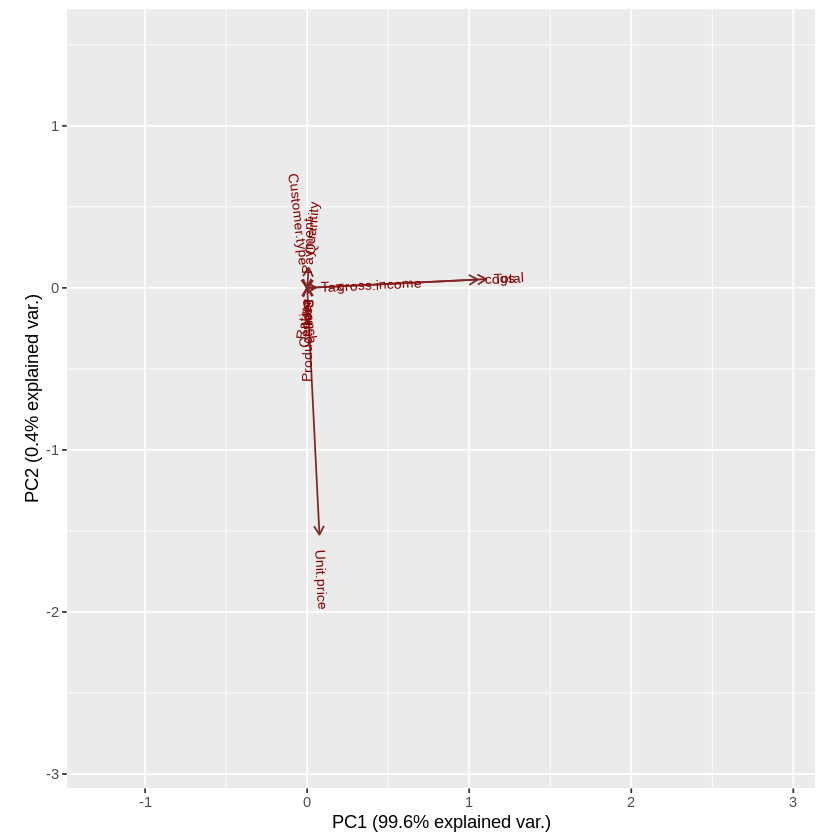

In [79]:
# plotting to get a visual on the variables that we can use (reduce to)
#
ggbiplot(df1.pca,obs.scale = 0.00001, var.scale = 0.00001,alpha = 0)

## Part 2: Feature Selection

In [80]:
# Installing and loading our caret package
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

In [81]:
# Installing and loading the corrplot package for plotting
#
suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)

In [82]:
# Calculating the correlation matrix
#
correlationMatrix <- cor(a)

# Find attributes that are highly correlated
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes
# 
highlyCorrelated

names(a[,highlyCorrelated])

[1]  7  9 10

[1] "Tax"          "cogs"         "gross.income"

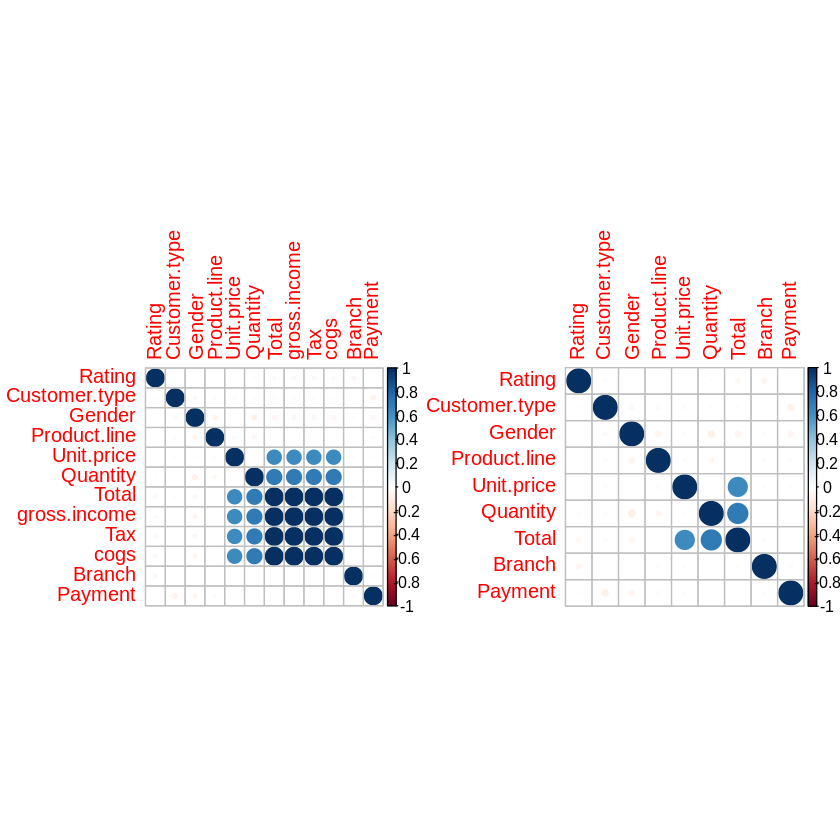

In [83]:
# removing the variables with a higher correlation 
# 
a2<-a[-highlyCorrelated]

# Performing our graphical comparison
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(a2), order = "hclust")

## Part 3: Association Rules

I will be using the df2 dataset

In [84]:
# Previewing our first 5 transactions
#
inspect(df2[1:5])

    items               
[1] {almonds,           
     antioxydant juice, 
     avocado,           
     cottage cheese,    
     energy drink,      
     frozen smoothie,   
     green grapes,      
     green tea,         
     honey,             
     low fat yogurt,    
     mineral water,     
     olive oil,         
     salad,             
     salmon,            
     shrimp,            
     spinach,           
     tomato juice,      
     vegetables mix,    
     whole weat flour,  
     yams}              
[2] {burgers,           
     eggs,              
     meatballs}         
[3] {chutney}           
[4] {avocado,           
     turkey}            
[5] {energy bar,        
     green tea,         
     milk,              
     mineral water,     
     whole wheat rice}  


In [85]:
# Previewing the items that make up our dataset
# 
items<-as.data.frame(itemLabels(df2))
colnames(items) <- "Item"
head(items, 20)

,Item
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [86]:
summary(df2)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

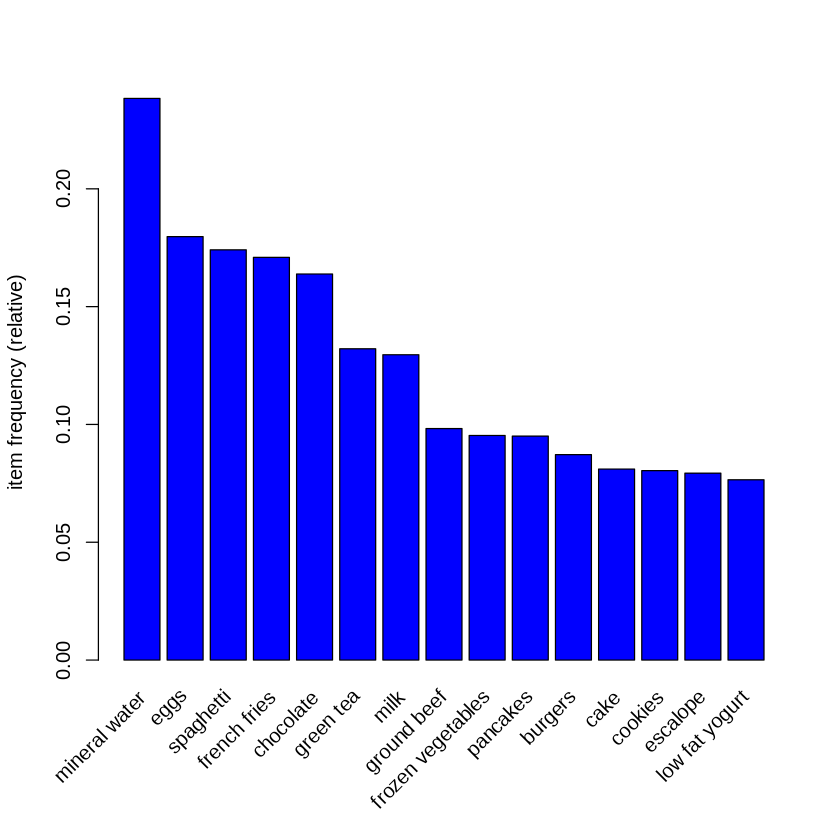

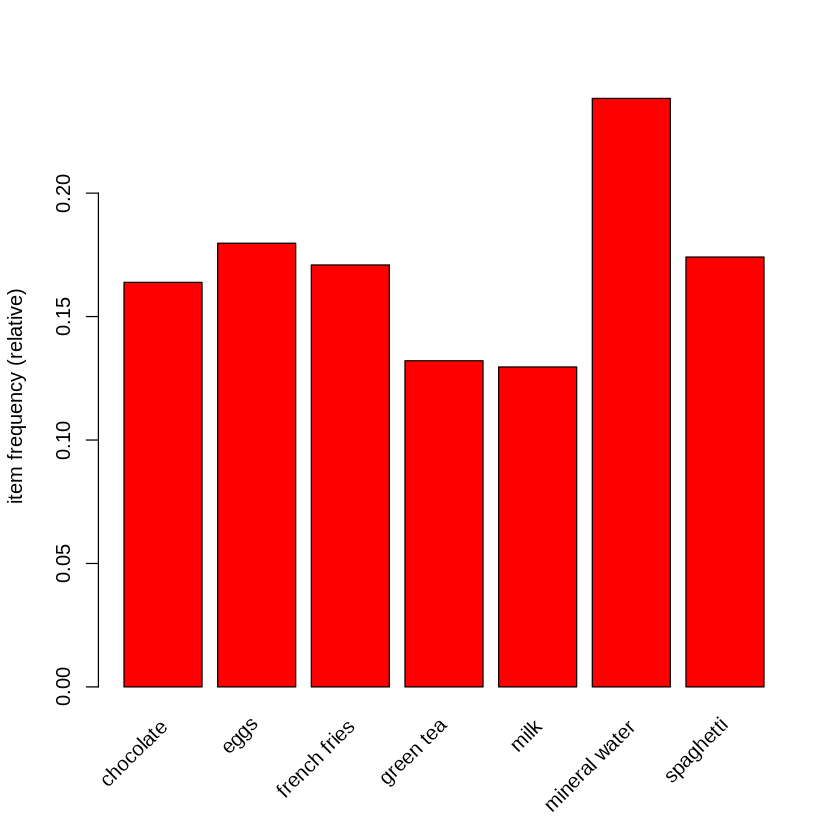

In [87]:
# Getting the frequency of items 
#

itemFrequencyPlot(df2, topN = 15,col="blue")
itemFrequencyPlot(df2, support = 0.1,col="red")

In [88]:
# creating a model using apriori function 
#
rules <- apriori (df2, parameter = list(supp = 0.001, conf = 0.8))
rules



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

74 rules is on a lower side thus decreasing the confidence level

In [89]:
rules2 <- apriori (df2, parameter = list(supp = 0.001, conf = 0.7))
rules2

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [200 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 200 rules 

200 rules is somewhat substantial

In [90]:
# Exploring our rules
#
summary(rules2)

set of 200 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6 
 44 122  33   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   3.955   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.7000   Min.   :0.001067   Min.   : 2.937  
 1st Qu.:0.001067   1st Qu.:0.7273   1st Qu.:0.001466   1st Qu.: 3.088  
 Median :0.001200   Median :0.7500   Median :0.001466   Median : 3.616  
 Mean   :0.001330   Mean   :0.7767   Mean   :0.001728   Mean   : 4.160  
 3rd Qu.:0.001466   3rd Qu.:0.8139   3rd Qu.:0.001866   3rd Qu.: 4.418  
 Max.   :0.003066   Max.   :1.0000   Max.   :0.004133   Max.   :12.722  
     count      
 Min.   : 8.00  
 1st Qu.: 8.00  
 Median : 9.00  
 Mean   : 9.98  
 3rd Qu.:11.00  
 Max.   :23.00  

mining info:
 data ntransactions support confidence
  df2          7501   0.001        0.7
                                                      

In [91]:
# Ordering these rules by the level of confidence
#
rules2<-sort(rules2, by="confidence", decreasing=TRUE)
inspect(rules2[1:10])

     lhs                        rhs                 support confidence    coverage      lift count
[1]  {french fries,                                                                               
      mushroom cream sauce,                                                                       
      pasta}                 => {escalope}      0.001066524  1.0000000 0.001066524 12.606723     8
[2]  {ground beef,                                                                                
      light cream,                                                                                
      olive oil}             => {mineral water} 0.001199840  1.0000000 0.001199840  4.195190     9
[3]  {cake,                                                                                       
      meatballs,                                                                                  
      mineral water}         => {milk}          0.001066524  1.0000000 0.001066524  7.717078     8
[4]  {cake

It is evident that the most frequently bought commodity is mineral water(5 out of 10 previewed) among the others.

In [92]:
# inspecting the support items and previeing the first 10
#
inspect(sort(rules2, by = 'support')[1:10])

     lhs                        rhs                 support confidence    coverage      lift count
[1]  {frozen vegetables,                                                                          
      milk,                                                                                       
      soup}                  => {mineral water} 0.003066258  0.7666667 0.003999467  3.216312    23
[2]  {cooking oil,                                                                                
      eggs,                                                                                       
      spaghetti}             => {mineral water} 0.002932942  0.7096774 0.004132782  2.977232    22
[3]  {chocolate,                                                                                  
      frozen vegetables,                                                                          
      olive oil}             => {mineral water} 0.002799627  0.7000000 0.003999467  2.936633    21
[4]  {eggs

In [93]:
# Checking the support commodities that were purchased with mineral water
#
mw<-subset(rules2,subset=rhs %pin% "mineral water")
# Sorting items by their confidence level
sorted_mw<-sort(mw,by="confidence",decreasing = TRUE)
# Viewing the top 10 items
inspect(sorted_mw[1:10])

     lhs                     rhs                 support confidence    coverage     lift count
[1]  {ground beef,                                                                            
      light cream,                                                                            
      olive oil}          => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[2]  {cake,                                                                                   
      olive oil,                                                                              
      shrimp}             => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[3]  {red wine,                                                                               
      soup}               => {mineral water} 0.001866418  0.9333333 0.001999733 3.915511    14
[4]  {ground beef,                                                                            
      pancakes,                                   

Olive oil,cake and ground beef seem to be the most common commodities bought together with mineral water.

## Part 4: Anomaly Detection

I will be using df3

In [94]:
# 
install.packages("anomalize")
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [95]:
# Viewing the dataset
#
head(df3)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [96]:
# checking the structure of df3
#
str(df3)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [97]:
# changing the column date to date type
#
df3$Date <- as.Date(df3$Date, format = "%m/%d/%Y")

# Viewing the changed dataset
#
head(df3)

,Date,Sales
,<date>,<dbl>
1,2019-01-05,548.9715
2,2019-03-08,80.2200
3,2019-03-03,340.5255
4,2019-01-27,489.0480
5,2019-02-08,634.3785
6,2019-03-25,627.6165


In [105]:

library(tibbletime)
# Grouping by Date
logs <- read_csv(df3) %>%
  group_by(Date) %>%
  summarise(Total_Sales = sum(Sales)) %>%
  #as_tbl_time(Date)

head(logs)